# Linear Algebra 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1: Predicting with dot product (given `X` and `c`, compute `y`)

1. use case for dot product:
    - `y = Xc + b`
2. one's column
3. matrix dot vector

$\begin{bmatrix}
1 & 2 \\ 3 & 4\\
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\ 1 \\
\end{bmatrix}$

In [2]:
houses = pd.DataFrame([[2, 1, 1985],
                       [3, 1, 1998],
                       [4, 3, 2005],
                       [4, 2, 2020]],
                      columns=["beds", "baths", "year"])
houses

beds  baths  year
0     2      1  1985
1     3      1  1998
2     4      3  2005
3     4      2  2020

In [3]:
def predict_price(house):
    """
    Takes row (as Series) as argument,
    returns estimated price (in thousands)
    """
    return ((house["beds"]*42.3) + (house["baths"]*10) + 
            (house["year"]*1.67) - 3213)

predict_price(houses.iloc[0])

196.54999999999973

In [4]:
# How do we convert a DataFrame into a numpy array?
X = houses.values
X

array([[   2,    1, 1985],
       [   3,    1, 1998],
       [   4,    3, 2005],
       [   4,    2, 2020]])

Simplifying intercept addition by including intercept inside `c` vector.

In [5]:
# Extract just first row of data
house0 = X[0:1, :]
house0

array([[   2,    1, 1985]])

In [6]:
# Create a vertical array (3 x 1) with the co-efficients
c = np.array([42.3, 10, 1.67]).reshape(-1, 1)
c

array([[42.3 ],
       [10.  ],
       [ 1.67]])

In [7]:
# horizontal @ vertical
house0 @ c

array([[3409.55]])

`y = Xc + b`

In [8]:
house0 @ c - 3213

array([[196.55]])

Let's add the intercept to the c vector for ease.

In [9]:
c = np.array([42.3, 10, 1.67, -3213]).reshape(-1, 1)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

If we directly try dot product now, it won't work because of difference in dimensions.

In [10]:
house0 @ c

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [11]:
house0.shape

(1, 3)

In [12]:
c.shape

(4, 1)

#### One's column

- Solution, add a 1's column to `X` using `np.concatenate`

In [13]:
# How can we generate an array of 1's using numpy?
ones_column = np.ones(4).reshape(-1, 1)
ones_column
# Adding one's column to X
X = np.concatenate([X, ones_column], axis=1)
X

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00],
       [3.000e+00, 1.000e+00, 1.998e+03, 1.000e+00],
       [4.000e+00, 3.000e+00, 2.005e+03, 1.000e+00],
       [4.000e+00, 2.000e+00, 2.020e+03, 1.000e+00]])

In [14]:
# Let's extract house0 again
house0 = X[0:1, :]
house0

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00]])

In [15]:
# Let's try house0 @ c now
house0 @ c

array([[196.55]])

In [16]:
# Extracting each house and doing the prediction with dot product
# Cumbersome
house0 = X[0:1, :]
print(house0 @ c)
house1 = X[1:2, :]
print(house1 @ c)
house2 = X[2:3, :]
print(house2 @ c)
house3 = X[3:4, :]
print(house3 @ c)

[[196.55]]
[[260.56]]
[[334.55]]
[[349.6]]


### `@` use cases

loops over each row of the firt array and computes dot product, which is ROW @ COEFs, that is, `X @ c`

In [17]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

### Problem 2: Fitting with `np.linalg.solve` (given `X` and `y`, find `c`)

**Above:** we estimated house prices using a linear model based on the dot product as follows:

$Xc = y$

* $X$ (known) is a matrix with house features (from DataFrame)
* $c$ (known) is a vector of coefficients (our model parameters)
* $y$ (computed) are the prices

**Below:** what if X and y are know, and we want to find c?

In [18]:
houses = pd.DataFrame([[2, 1, 1985, 196.55],
                       [3, 1, 1998, 260.56],
                       [4, 3, 2005, 334.55],
                       [4, 2, 2020, 349.60]],
                      columns=["beds", "baths", "year", "price"])
houses

beds  baths  year   price
0     2      1  1985  196.55
1     3      1  1998  260.56
2     4      3  2005  334.55
3     4      2  2020  349.60

If we assume price is linearly based on the features, with this equation:

* $beds*c_0 + baths*c_1 + year*c_2 + 1*c_3 = price$

Then we get four equations:

* $2*c_0 + 1*c_1 + 1985*c_2 + 1*c_3 = 196.55$
* $3*c_0 + 1*c_1 + 1998*c_2 + 1*c_3 = 260.56$
* $4*c_0 + 3*c_1 + 2005*c_2 + 1*c_3 = 334.55$
* $4*c_0 + 2*c_1 + 2020*c_2 + 1*c_3 = 349.60$


#### `c = np.linalg.solve(X, y)`

- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In [19]:
# Add a column of 1s to this DataFrame
houses["ones"] = 1
houses

beds  baths  year   price  ones
0     2      1  1985  196.55     1
1     3      1  1998  260.56     1
2     4      3  2005  334.55     1
3     4      2  2020  349.60     1

In [20]:
# Extract X ---> features: ["beds", "baths", "year", "ones"]
X = houses[["beds", "baths", "year", "ones"]].values
X

array([[   2,    1, 1985,    1],
       [   3,    1, 1998,    1],
       [   4,    3, 2005,    1],
       [   4,    2, 2020,    1]])

In [21]:
# Extract y ---> prediction value: ["price"]
# Unlike predict method argument, we need a DataFrame here, 
# Reason: so that we can convert that into numpy array
y = houses[["price"]].values
y

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [22]:
# Let's take a look at the co-efficients which we were using for our prediction
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [23]:
c = np.linalg.solve(X, y)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [24]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

What is the predicted price of a 6-bedroom 5-bathroom house built in 2024?

In [25]:
dream_house = np.array([[6, 5, 2024, 1]])
dream_house

array([[   6,    5, 2024,    1]])

In [26]:
dream_house @ c

array([[470.88]])

### Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [27]:
X = np.array([[4, 5], [6, 7], [8, 9]])
c = np.array([2, 3]).reshape(-1, 1)
X @ c

array([[23],
       [33],
       [43]])

### Row Picture

Do dot product one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [28]:
def row_dot_product(X, c):
    """
    function that performs same action as @ operator
    """
    result = []
    # loop over each row index of X
    for row_idx in range(X.shape[0]):
        # extract each row using slicing
        # why slicing? we want two dimensional array
        row = X[row_idx:row_idx+1, :]
        # DOT PRODUCT the row with c
        result.append((row @ c).item())
    # convert result into a vertical numpy array
    return np.array(result).reshape(-1, 1)
    
row_dot_product(X, c)

array([[23],
       [33],
       [43]])

In [29]:
X.shape

(3, 2)

### Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

Dot product takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [30]:
def col_dot_product(X, c):
    """
    same result as row_dot_product above, 
    but different definition / code
    """
    # initialize a vertical vector of zeros
    total = np.zeros(X.shape[0]).reshape(-1, 1)
    # loop over each col index of X
    for col_idx in range(X.shape[1]):
        # extract each column using slicing
        col = X[:, col_idx:col_idx+1]
        # extract weight for the column using indexing
        weight = c[col_idx, 0]
        # add weighted column to total
        total += col * weight
    return total
    
col_dot_product(X, c)

array([[23.],
       [33.],
       [43.]])

In [31]:
X.shape

(3, 2)

In [32]:
# Create a vertical vector / array containing 3 0's
np.zeros(3).reshape(-1, 1)

array([[0.],
       [0.],
       [0.]])

### Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [33]:
A = np.array([
    [1, 100],
    [2, 10],
    [3, 0]
])
B = np.array([
    [1, 0],
    [0, 2],
    [0, 3],
    [0, 0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [34]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([1, 1]).reshape(-1, 1)

array([[101],
       [ 12],
       [  3]])

In [35]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([-1, 0]).reshape(-1, 1)

array([[-1],
       [-2],
       [-3]])

In [36]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 2]).reshape(-1, 1)

array([[200],
       [ 20],
       [  0]])

In [37]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 0]).reshape(-1, 1)

array([[0],
       [0],
       [0]])

A right-sized zero vector will always be in the column space.

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [38]:
c = np.array([-1, 1]).reshape(-1, 1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

### Solution
- in the column space of B: 
    - a [2, 1]
    - c [-10, 0]
    - e [-1, 1]
- not in the column space: 
    - b (no weighting of 0 and 0 can make a 1)
    - d (if you multiple 2 and 3 by the same constant, the sign will be the same)

### Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

#### Fruit Sales Example

##### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

##### Equations

* `10*apple + basket = 7`
* `2*apple + 8*banana + basket = 5`
* `4*apple + 4*banana + basket = 5`

#### There is a solution for the system of equations and `np.linalg.solve` can find it.

In [39]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
])
y = np.array([7, 5, 5]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [40]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1]])

In [41]:
np.array([[ 4,  4,  1]]) @ c

array([[5.]])

In [42]:
np.array([[ 5,  5,  1]]) @ c

array([[5.75]])

#### There is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it.

- mathematically solvable

In [43]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding the new combination
    [5, 5, 1],
])
y = np.array([7, 5, 5, 5.75]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent statements

* there is a solution for the system of equations and `np.linalg.solve` can find it
* there is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

### Problem with most tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [44]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1]])

In [45]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75]])

Dot product both sides by `X.T` ---> this will usually make it solvable.

In [46]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

What is special about dot product of a matrix with its transpose? Resultant shape is always a square.

In [47]:
(X.T @ X).shape

(3, 3)

**IMPORTANT**: We are not going to discuss how dot product works between two matrices. That is beyond the scope of CS320.

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = y$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back a new vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [48]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [49]:
c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

Multiply both sides by `X.T` ---> this will usually make it solvable.

In [50]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.54861111],
       [0.29861111],
       [1.55555556]])

What is special about multiplication of a matrix with its transpose? Resultant shape is always a square.

In [51]:
X.T.shape

(3, 5)

In [52]:
X.shape

(5, 3)

In [53]:
(X.T @ X).shape

(3, 3)

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [54]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [55]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [56]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [57]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [58]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

x          y
0  2.457268   6.443569
1  3.135322   6.148335
2  6.179865  12.321621
3  4.430829   8.021383
4  5.112592  10.218929
5  2.974205   6.030322
6  4.791755  10.157226
7  1.871502   3.409193
8  4.826732   9.876410
9  4.257244  10.435702

<Axes: xlabel='x', ylabel='y'>

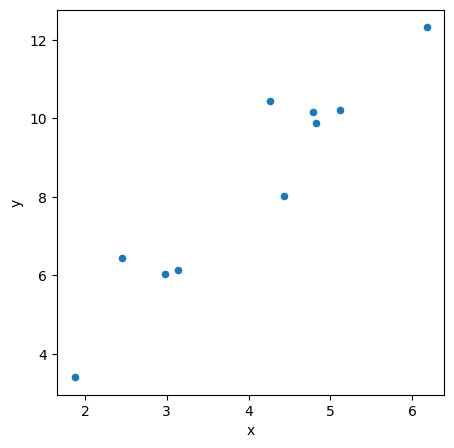

In [59]:
df.plot.scatter(x="x", y="y", figsize=(5, 5))

In [60]:
X = df[["x"]].values
X

array([[2.45726844],
       [3.13532163],
       [6.17986536],
       [4.4308288 ],
       [5.1125918 ],
       [2.97420546],
       [4.79175498],
       [1.87150233],
       [4.82673247],
       [4.25724431]])

In [61]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.0341988 , 0.04363555, 0.0860077 , 0.06166565, 0.07115402,
        0.04139323, 0.0666888 , 0.02604646, 0.0671756 , 0.0592498 ],
       [0.04363555, 0.05567624, 0.10974048, 0.07868153, 0.0907881 ,
        0.05281518, 0.08509076, 0.03323366, 0.08571189, 0.07559906],
       [0.0860077 , 0.10974048, 0.2163036 , 0.15508497, 0.17894759,
        0.10410119, 0.16771787, 0.0655051 , 0.16894213, 0.14900928],
       [0.06166565, 0.07868153, 0.15508497, 0.11119254, 0.12830152,
        0.07463829, 0.12025006, 0.04696573, 0.12112783, 0.10683641],
       [0.07115402, 0.0907881 , 0.17894759, 0.12830152, 0.14804303,
        0.08612273, 0.1387527 , 0.05419225, 0.13976553, 0.12327512],
       [0.04139323, 0.05281518, 0.10410119, 0.07463829, 0.08612273,
        0.05010115, 0.08071817, 0.03152587, 0.08130737, 0.07171422],
       [0.0666888 , 0.08509076, 0.16771787, 0.12025006, 0.1387527 ,
        0.08071817, 0.13004538, 0.05079146, 0.13099465, 0.11553908],
       [0.02604646, 0.03323366, 0.0655051

In [62]:
df["p"] = P @ df[["y"]]
df

x          y          p
0  2.457268   6.443569   5.067716
1  3.135322   6.148335   6.466091
2  6.179865  12.321621  12.744967
3  4.430829   8.021383   9.137864
4  5.112592  10.218929  10.543889
5  2.974205   6.030322   6.133815
6  4.791755  10.157226   9.882215
7  1.871502   3.409193   3.859669
8  4.826732   9.876410   9.954351
9  4.257244  10.435702   8.779874

<Axes: xlabel='x', ylabel='p'>

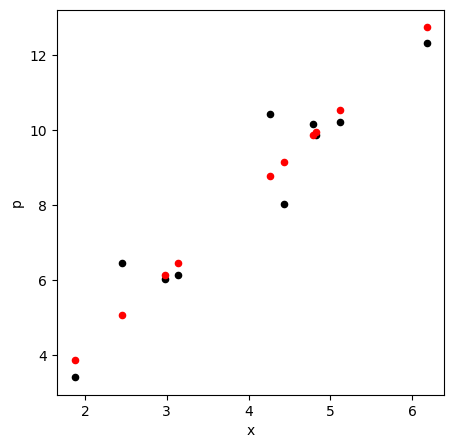

In [63]:
ax = df.plot.scatter(x="x", y="y", figsize=(5,5), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [64]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

v1  v2
x   1   4
y   8  12

In [65]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [66]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

2.561718483508864

### Lab review

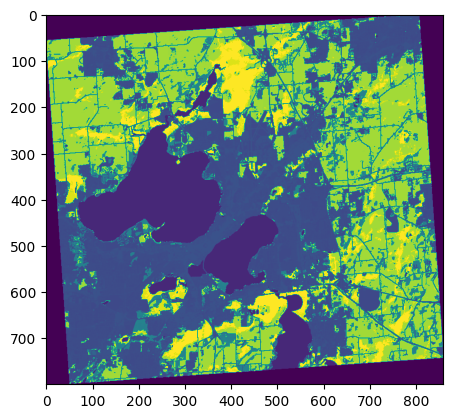

In [67]:
# As an exception, I am providing all the relevant import statements in this cell
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip:land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])